In [511]:
import logging
import os
import pickle
import time
import statistics
from abc import abstractmethod

import colorsys
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import hdbscan

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
import statistics



<font size = 5>Load Data, Create airspeedchange feature and Drop other rows</font>

In [512]:
f0 = 'base.csv'
f1 = 'random1.csv'
f2 = 'wind1.csv'
f3 = 'engine1.csv'
f4 = 'sensor1.csv'
f5 = 'crash.csv'

base_df = pd.read_csv(f0, header=0, index_col=None)
random1_df = pd.read_csv(f1, header=0, index_col=None)
wind1_df = pd.read_csv(f2, header=0, index_col=None)
engine1_df = pd.read_csv(f3, header=0, index_col=None)
sensor1_df = pd.read_csv(f4, header=0, index_col=None)
crash1_df = pd.read_csv(f5, header=0, index_col=None)

df_list = [base_df, random1_df, wind1_df, engine1_df, sensor1_df,crash1_df]

for df in df_list:

    df['airspeedchange'] = df['airspeed']- df['airspeed'].shift(1)
    df['airspeedchange'].fillna(0, inplace=True)

base_df = base_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed',  'airspeedchange']]
random1_df = random1_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed', 'airspeedchange']]
wind1_df = wind1_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed', 'airspeedchange']]
engine1_df = engine1_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed', 'airspeedchange']]
sensor1_df = sensor1_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed', 'airspeedchange']]
crash1_df = crash1_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed', 'airspeedchange']]



<font size = 5>Count anomalies</font>

In [513]:
random1_nonanomalies = len(random1_df)
wind1_anomalies = len(wind1_df)
engine1_anomalies = len(engine1_df)
sensor1_anomalies = len(sensor1_df)
crash1_anomalies = len(crash1_df)


<font size = 5>Train OPTICS Model with Base Dataset</font>

In [514]:
optics_clustering = OPTICS(min_samples = 50).fit(base_df)
labels = optics_clustering.labels_
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [515]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

df_copy = base_df
df_copy['clusters'] = labels

Estimated no. of clusters: 3
Estimated no. of noise points: 3


/var/folders/f3/zd51vztd1hz1f_fhbtyppk0w0000gn/T/ipykernel_81108/41884822.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['clusters'] = labels


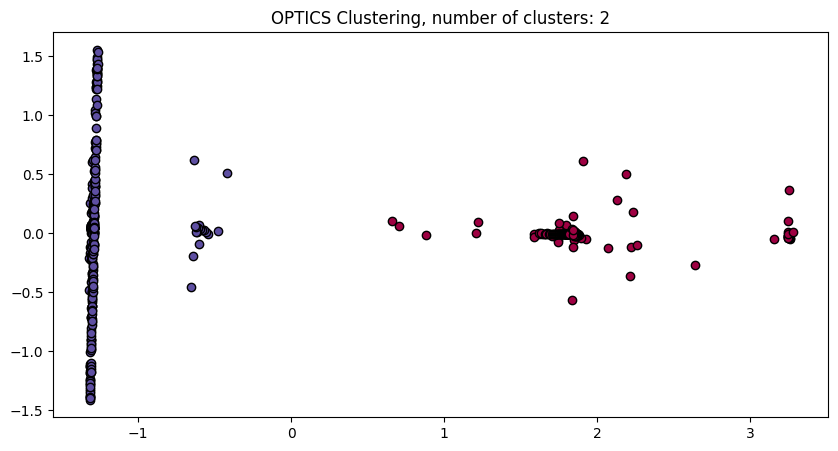

In [516]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)

labels = optics_clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # number of clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, n_clusters)]  # generate colors for clusters
plt.figure(figsize=(10, 5))
for k, col in zip(set(labels), colors):
    if k == -1:
        # noise points are plotted in black
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = reduced_data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('OPTICS Clustering, number of clusters: %d' % n_clusters)
plt.show()

<font size = 5>Predicting using random missions (RQ1)</font>

In [517]:
random1_df2 = random1_df.copy()
random1_df2['cluster'] = optics_clustering.fit_predict(random1_df2)
random1_df2['cluster'].value_counts()

-1    104
 2    100
 0     92
 1     58
Name: cluster, dtype: int64

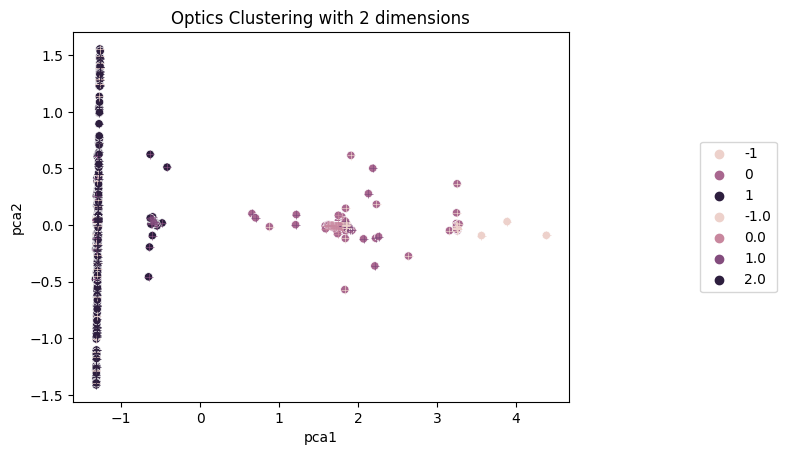

In [518]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)
test_reduced_data = PCA(n_components=pca_num_components).fit_transform(random1_df2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
test_results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])


sns.scatterplot(x="pca1", y="pca2", hue=base_df['clusters'], data=results)
sns.scatterplot(x="pca1", y="pca2", hue=random1_df2['cluster'], marker = '+', data=test_results)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Optics Clustering with 2 dimensions')
plt.show()

<font size = 5> Finding number of nonanomalies for random missions </font>

In [519]:
clusters = df_copy['clusters'].unique()
count = 0

for i in range(len(random1_df2)):
    if int(random1_df2.iloc[i]['cluster']) == -1:
        count += 1
    elif int(random1_df2.iloc[i]['cluster']) not in clusters:
        count += 1

nonanomalies = random1_anomalies - count
nonanomaly_percentage = nonanomalies/random1_anomalies*100

print(nonanomalies, "of the observations are nonanomalies, which is equal to", nonanomaly_percentage,"%")

150 of the observations are nonanomalies, which is equal to 42.3728813559322 %


<font size = 5> Predicting using Wind Proxy (RQ2 1/3) </font>

In [520]:
wind1_df2 = wind1_df.copy()
wind1_df2['cluster'] = optics_clustering.fit_predict(wind1_df2)
wind1_df2['cluster'].value_counts()

 2    361
-1    155
 0     94
 1     64
Name: cluster, dtype: int64

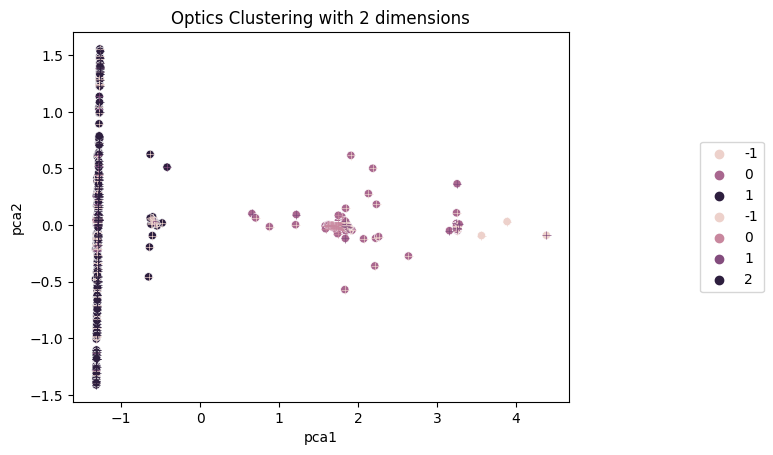

In [521]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)
test_reduced_data = PCA(n_components=pca_num_components).fit_transform(wind1_df2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
test_results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])


sns.scatterplot(x="pca1", y="pca2", hue=base_df['clusters'], data=results)
sns.scatterplot(x="pca1", y="pca2", hue=wind1_df2['cluster'], marker = '+', data=test_results)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Optics Clustering with 2 dimensions')
plt.show()

<font size = 5> Finding number of outliers for Wind proxy </font>

In [522]:
clusters = df_copy['clusters'].unique()
count = 0

for i in range(len(wind1_df2)):
    if int(wind1_df2.iloc[i]['cluster']) == -1:
        count += 1
    elif int(wind1_df2.iloc[i]['cluster']) not in clusters:
        count += 1

anomaly_percentage = count/wind1_anomalies*100

print(count, "of the observations are anomalies, which is equal to", anomaly_percentage,"%")

516 of the observations are anomalies, which is equal to 76.55786350148368 %


<font size = 5> Predicting using Engine Faults (RQ2 2/3) </font>



In [523]:
engine1_df2 = engine1_df.copy()
engine1_df2['cluster'] = optics_clustering.fit_predict(engine1_df2)
engine1_df2['cluster'].value_counts()

-1    289
 0     67
 2     63
 1     51
Name: cluster, dtype: int64

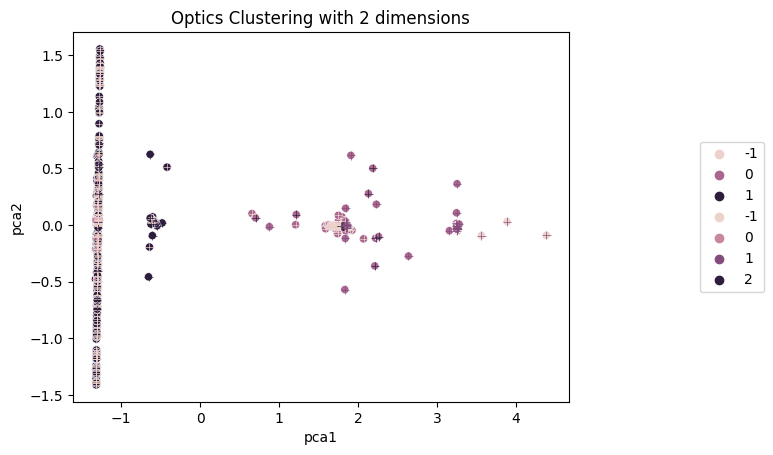

In [524]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)
test_reduced_data = PCA(n_components=pca_num_components).fit_transform(engine1_df2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
test_results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])


sns.scatterplot(x="pca1", y="pca2", hue=base_df['clusters'], data=results)
sns.scatterplot(x="pca1", y="pca2", hue=engine1_df2['cluster'], marker = '+', data=test_results)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Optics Clustering with 2 dimensions')
plt.show()

<font size = 5> Finding number of outliers for Engine Faults </font>

In [525]:
clusters = df_copy['clusters'].unique()
count = 0

for i in range(len(engine1_df2)):
    if int(engine1_df2.iloc[i]['cluster']) == -1:
        count += 1
    elif int(engine1_df2.iloc[i]['cluster']) not in clusters:
        count += 1

anomaly_percentage = count/engine1_anomalies*100

print(count, "of the observations are anomalies, which is equal to", anomaly_percentage,"%")

352 of the observations are anomalies, which is equal to 74.8936170212766 %


<font size = 5> Predicting using Manually Injected Sensor Faults (RQ2 3/3) </font>


In [526]:
sensor1_df2 = sensor1_df.copy()
sensor1_df2['cluster'] = optics_clustering.fit_predict(sensor1_df2)
sensor1_df2['cluster'].value_counts()

-1    161
 0     51
Name: cluster, dtype: int64

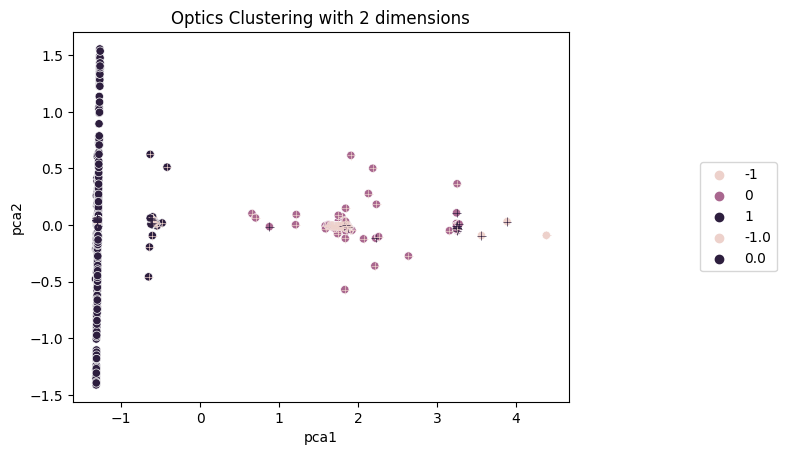

In [527]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)
test_reduced_data = PCA(n_components=pca_num_components).fit_transform(sensor1_df2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
test_results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])


sns.scatterplot(x="pca1", y="pca2", hue=base_df['clusters'], data=results)
sns.scatterplot(x="pca1", y="pca2", hue=sensor1_df2['cluster'], marker = '+', data=test_results)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Optics Clustering with 2 dimensions')
plt.show()

<font size = 5> Finding number of outliers for Sensor Faults </font>

In [528]:
clusters = df_copy['clusters'].unique()
count = 0

for i in range(len(sensor1_df2)):
    if int(sensor1_df2.iloc[i]['cluster']) == -1:
        count += 1
    elif int(sensor1_df2.iloc[i]['cluster']) not in clusters:
        count += 1

anomaly_percentage = count/sensor1_anomalies*100

print(count, "of the observations are anomalies, which is equal to", anomaly_percentage,"%")

161 of the observations are anomalies, which is equal to 75.94339622641509 %


<font size = 5> Predicting using Crash Faults (RQ2 4/4) </font>


In [529]:
crash1_df2 = crash1_df.copy()
crash1_df2['cluster'] = optics_clustering.fit_predict(crash1_df2)
crash1_df2['cluster'].value_counts()

0    74
Name: cluster, dtype: int64

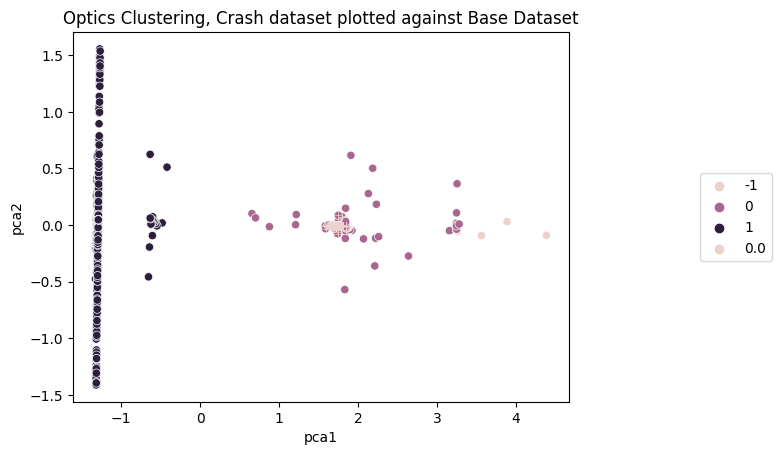

In [530]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)
test_reduced_data = PCA(n_components=pca_num_components).fit_transform(crash1_df2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
test_results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])


sns.scatterplot(x="pca1", y="pca2", hue=base_df['clusters'], data=results)
sns.scatterplot(x="pca1", y="pca2", hue=crash1_df2['cluster'], marker = '+' ,data=test_results)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Optics Clustering, Crash dataset plotted against Base Dataset')
plt.show()

In [531]:
clusters = df_copy['clusters'].unique()
count = 0

for i in range(len(crash1_df2)):
    if int(crash1_df2.iloc[i]['cluster']) == -1:
        count += 1
    elif int(crash1_df2.iloc[i]['cluster']) not in clusters:
        count += 1

anomaly_percentage = count/crash1_anomalies*100

print(count, "of the observations are anomalies, which is equal to", anomaly_percentage,"%")

0 of the observations are anomalies, which is equal to 0.0 %
